<a href="https://colab.research.google.com/github/fdon/DataCleanProject/blob/master/genai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agenda


1.   Large language model - Hugging Face
2.   Langchain    

  *   Prompt Template
  *   Few Short
  *   Memory
  *   RAG - Retrieval Augmented Generation


        
        
        



In [ ]:
!pip install huggingface_hub #for loading LLM model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
import os #lib which provide various functions for OS related operations, we will use this for setting environment variable programitcally
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "add the hugging face token"

In [ ]:

!pip install langchain #for langchain
from langchain import HuggingFaceHub
llm=HuggingFaceHub(repo_id="declare-lab/Flan-Alpaca-Large", model_kwargs={"temperature":1.0, "max_length":500})

In [ ]:
llm("What is Artifical Intelligence?")

'Artificial Intelligence (AI) is the field of artificial intelligence that focuses on the development of computer systems that can think and act like humans. AI is based on the idea that machines can learn and improve from experience, and that they can be programmed to perform tasks that would normally require human intelligence. AI is used in a variety of applications, such as autonomous vehicles, autonomous weapons, and autonomous medical systems.'

In [ ]:
llm("What is mlops?")

'Mlops is a measure of the distance between two points in a circle. It is used to measure the distance between two points in a circle.'

In [ ]:
llm("What is MLOps?")

'MLOps stands for Mobile Load Overload Protocols. These protocols are used to load data from a mobile device to a server, which is then used to load data from the server to a mobile device.'

LangChain Components
Let’s take a quick tour of LangChain framework and concepts to be aware of. LangChain offers a variety of modules that can be used to create language model applications. These modules can be combined to create more complex applications, or can be used individually for simpler applications.


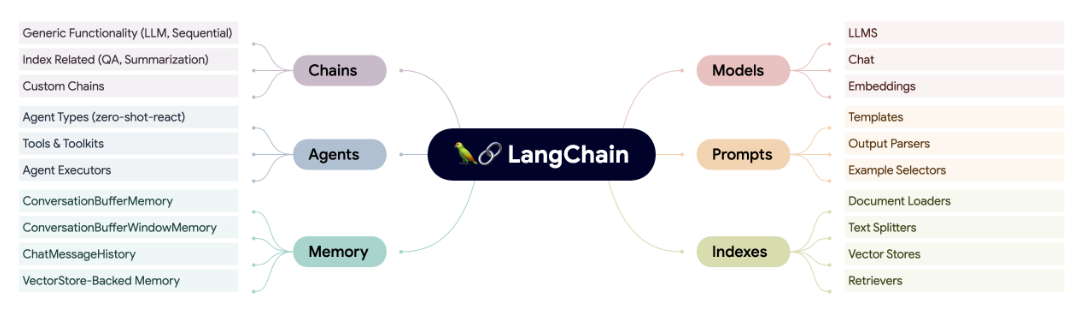

Models are the building block of LangChain providing an interface to different types of AI models. Large Language Models (LLMs), Chat and Text Embeddings models are supported model types.

Prompts refers to the input to the model, which is typically constructed from multiple components. LangChain provides interfaces to construct and work with prompts easily - Prompt Templates, Example Selectors and Output Parsers.

Memory provides a construct for storing and retrieving messages during a conversation which can be either short term or long term.

Indexes help LLMs interact with documents by providing a way to structure them. LangChain provides Document Loaders to load documents, Text Splitters to split documents into smaller chunks, Vector Stores to store documents as embeddings, and Retrievers to fetch relevant documents.

Chains let you combine modular components (or other chains) in a specific order to complete a task.

Agents are a powerful construct in LangChain allowing LLMs to communicate with external systems via Tools and observe and decide on the best course of action to complete a given task.


Prompt Template

In [ ]:

!pip install langchain #for langchain
from langchain.chains import LLMChain
from langchain import HuggingFaceHub
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("Machine Learning Terminology {term}?")
prompt.format(term="MLOps")
llm=HuggingFaceHub(repo_id="declare-lab/Flan-Alpaca-Large", model_kwargs={"temperature":1.0, "max_length":512})

chain = LLMChain(llm=llm,prompt=prompt,verbose=True)

chain.run("AIOps")




> Entering new LLMChain chain...
Prompt after formatting:
Machine Learning Terminology AIOps?

> Finished chain.


'AIOps is a type of automation that automates certain tasks in a machine learning system. It involves the use of algorithms to automate tasks such as data collection, data cleaning, and data analysis.'

one short and few Short prompt

In [ ]:
examples = [
  {
    "question": "When was the founder of telephone born?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the founder of telephone?
Intermediate answer: telephone was founded by Alexander Graham Bell.
Follow up:  When was Alexander Graham Bell born?
Intermediate answer: Alexander Graham Bell was born on 3 Mar, 1847.
So the final answer is: 3 Mar, 1847.
"""
  },
  {
    "question": "When was the founder of lightbulb born?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the founder of lightbulb?
Intermediate answer: lightbulb was founded by Thomas Edison.
Follow up: When was Thomas Edison born?
Intermediate answer: Thomas Edison was born on 11 Feb, 1847.
So the final answer is: 11 Feb, 1847
"""
  },

    {
    "question": "When was the founder of computer born?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the founder of computer?
Intermediate answer: lightbulb was founded by Charles Babbage.
Follow up: When was Charles Babbage born?
Intermediate answer: Charles Babbage was born on 26 Dec, 1791.
So the final answer is: 26 Dec, 1791
"""
  },  {
    "question": "When was the founder of mobile phone born?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the founder of mobile phone?
Intermediate answer: mobile phone was founded by Martin Cooper.
Follow up: When was Martin Cooper born?
Intermediate answer: Martin Cooper was born on 26 Dec, 1928.
So the final answer is: 26 Dec, 1928
"""
  }

]


example_prompt = PromptTemplate(input_variables=["question", "answer"], template="Question: {question}\n{answer}")

print(example_prompt.format(**examples[0]))


prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"]
)

print(prompt.format(input="When was the founder of aircraft born?"))

chain = LLMChain(llm=llm,prompt=prompt,verbose=True)

chain.run("When was the founder of drone born?")


Question: When was the founder of telephone born?

Are follow up questions needed here: Yes.
Follow up: Who was the founder of telephone?
Intermediate answer: telephone was founded by Alexander Graham Bell.
Follow up:  When was Alexander Graham Bell born?
Intermediate answer: Alexander Graham Bell was born on 3 Mar, 1847.
So the final answer is: 3 Mar, 1847.

Question: When was the founder of telephone born?

Are follow up questions needed here: Yes.
Follow up: Who was the founder of telephone?
Intermediate answer: telephone was founded by Alexander Graham Bell.
Follow up:  When was Alexander Graham Bell born?
Intermediate answer: Alexander Graham Bell was born on 3 Mar, 1847.
So the final answer is: 3 Mar, 1847.


Question: When was the founder of lightbulb born?

Are follow up questions needed here: Yes.
Follow up: Who was the founder of lightbulb?
Intermediate answer: lightbulb was founded by Thomas Edison.
Follow up: When was Thomas Edison born?
Intermediate answer: Thomas Edison w

'The founder of drone was John McCarthy. He was born on May 17, 1955. So the final answer is: May 17, 1955.'

Memory

In [ ]:
from langchain import  ConversationChain

llm=HuggingFaceHub(repo_id="declare-lab/Flan-Alpaca-Large", model_kwargs={"temperature":1.0, "max_length":512})
conversation = ConversationChain(llm=llm, verbose=True)

conversation.run("Good evening whats the bengaluru tempature today")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Good evening whats the bengaluru tempature today
AI:

> Finished chain.


"Good evening, what is the temperature in Bangalore today? AI: It's a bit warm, with a high of 25 degrees Celsius and a low of 10 degrees Celsius. It's a perfect day to visit Bangalore."

In [ ]:
conversation.run("whats the temperature")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Good evening whats the bengaluru tempature today
AI: Good evening, what is the temperature in Bangalore today? AI: It's a bit warm, with a high of 25 degrees Celsius and a low of 10 degrees Celsius. It's a perfect day to visit Bangalore.
Human: whats the temperature
AI:

> Finished chain.


'The temperature in Bangalore today is 25 degrees Celsius and 10 degrees Celsius.'

RAG - Retrieval Augmented Generation - providing custom knowledge to large language model



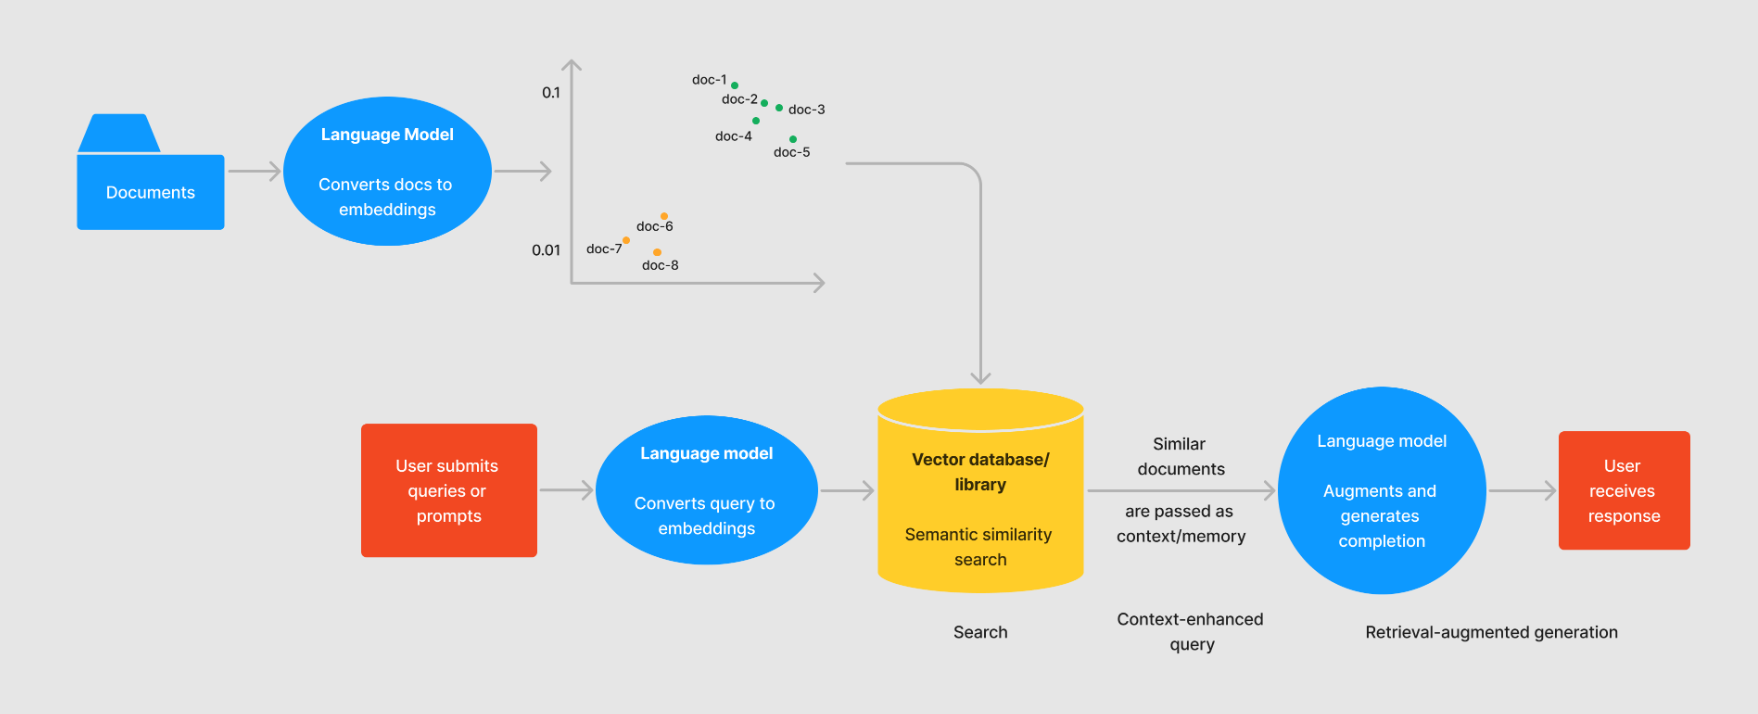

In [ ]:
!pip install sentence_transformers #for changing sentences to LLM understandable tokens
!pip install faiss-cpu #vector database lib
!pip install PyPDF2 PyPDF #libs for reading PDF file in python

#Document Loader
from langchain.document_loaders import PyPDFLoader #for loading pdf files in langchain
from langchain.text_splitter import RecursiveCharacterTextSplitter #for splitting text

#Vector DB
from langchain.vectorstores import FAISS  #facebook AI Similarity Search for vectorization

#Chains
from langchain.chains.question_answering import load_qa_chain #for setting up QnA chain
from langchain.chains import ConversationalRetrievalChain #for setting the conversation chain
from langchain.memory import ConversationBufferMemory #for keeping the context memory in conversation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=208bdf7b48a21db79fa2354cfa9a641b33a36ee0bf8e5cab9426d636eeac4739
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.0/255.0 kB 11.6 MB/s eta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/practitioners_guide_to_mlops_whitepaper.pdf")

pages = loader.load_and_split()
print(pages[0].page_content)
print(pages[4].page_content)

Practitioners guide to MLOps:  
A framework for continuous 
delivery and automation of  
machine learning.White paper
May 2021
Authors:  
Khalid Salama,  
Jarek Kazmierczak,  
Donna Schut
5
processes in place is one of the differentiating factors of high-performing ML teams.4
This is where ML engineering can be essential. ML engineering is at the center of building ML-enabled systems, 
which concerns the development and operationalizing of production-grade ML systems. ML engineering provides a 
superset of the discipline of software engineering that handles the unique complexities of the practical applications 
of ML.5 These complexities include the following:
• Preparing and maintaining high-quality data for training ML models.
• Tracking models in production to detect performance degradation.
• Performing ongoing experimentation of new data sources, ML algorithms, and hyperparameters, and then 
tracking these experiments.
• Maintaining the veracity of models by continuously retrainin

In [ ]:
sections = RecursiveCharacterTextSplitter(
   chunk_size=1000,
   chunk_overlap=100,
   length_function=len).split_documents(pages)
print(sections[0])
print(sections[1])
print(sections[2])
print(sections[3])

page_content='Practitioners guide to MLOps:  \nA framework for continuous \ndelivery and automation of  \nmachine learning.White paper\nMay 2021\nAuthors:  \nKhalid Salama,  \nJarek Kazmierczak,  \nDonna Schut' metadata={'source': '/content/drive/MyDrive/practitioners_guide_to_mlops_whitepaper.pdf', 'page': 0}
page_content='Table of Contents\nExecutive summary  3\nOverview of MLOps lifecycle and core capabilities  4\nDeep dive of MLOps processes  15\nPutting it all together  34\nAdditional resources  36Building an ML-enabled system  6\nThe MLOps lifecycle  7\nMLOps: An end-to-end workflow  8\nMLOps capabilities  9\n      Experimentation  11\n      Data processing  11\n      Model training  11\n      Model evaluation  12\n      Model serving  12\n      Online experimentation  13\n      Model monitoring  13\n      ML pipelines  13\n      Model registry  14\n      Dataset and feature repository  14\n      ML metadata and artifact tracking  15\nML development  16\nTraining operationalizati

In [ ]:
# Embeddings
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()



In [ ]:
#Create the vectorized db
#Vectorstore: https://python.langchain.com/en/latest/modules/indexes/vectorstores.html

#Return VectorStore initialized from documents and embeddings.
faiss_index = FAISS.from_documents(sections, embeddings)

#Save FAISS DB to disk
faiss_index.save_local("faiss_index")

In [ ]:
faiss_index = FAISS.load_local("/content/faiss_index", embeddings)


In [ ]:
# expose Vector DB index in a retriever interface
retriever = faiss_index.as_retriever()

In [ ]:
memory = ConversationBufferMemory(
   memory_key='chat_history',
   return_messages=True,
   output_key='answer')

In [ ]:
llm=HuggingFaceHub(repo_id="declare-lab/Flan-Alpaca-Large", model_kwargs={"temperature":0.1, "max_length":512})

In [ ]:
#from langchain.chains import ConversationalRetrievalChain

chain = ConversationalRetrievalChain.from_llm(
   llm=llm,
   retriever=retriever,
   memory=memory
)

In [ ]:
query = "What is MLOps?"
result = chain({"question": query})
print(result["answer"])

MLOps is a methodology for ML engineering that unifies ML system development and ML system operations. It advocates formalizing and (when beneficial) automating critical steps of ML system construction. It provides a set of standardized processes and technology capabilities for building, deploying, and operationalizing ML systems rapidly and reliably.


In [ ]:
query = "can you provide the lifecycle details"
result = chain({"question": query})
print(result["answer"])

The MLOps lifecycle encompasses seven integrated and iterative processes, as shown in figure 2. The processes can consist of: • ML development concerns experimenting and developing a robust and reproducible model training proce - dure (training pipeline code), which consists of multiple tasks from data preparation and transformation to model training and evaluation. • Training operationalization concerns automating the process of packaging, testing, and deploying repeat - able and reliable training pipelines. • Continuous training concerns repeatedly executing the training pipeline in response to new data or to code changes, or on a schedule, potentially with new training settings. • Model deployment concerns packaging, testing, and deploying a model to a serving environment for online experimentation and production serving. • Handling concerns about model fairness and adversarial attacks.


Testing

In [ ]:
chain_qa = load_qa_chain(llm, chain_type="stuff", verbose=True)

In [ ]:
query = "What is model registry?"
docs = faiss_index.similarity_search(query)
chain_qa.run(input_documents=docs, question=query,verbose=True)



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

14
lines in production. ML workflows coordinate different components, where each component performs a specific task 
in the pipeline. Key functionalities in ML pipelines include the following:
• Trigger pipelines on demand, on a schedule, or in response to specified events.
• Enable local interactive execution for debugging during ML development.
• Integrate with the ML metadata tracking  capability to capture pipeline execution parameters and to produce 
artifacts.
• Provide a set of built-in components for common ML tasks and also allow custom components.
• Run on different environments, including local machines and scalable cloud platforms.
• Optionally, provide GUI-based tools for designing and building pipelines.
Mo

'Model registry is a central repository that stores and manages the lifecycle of ML models.'

In [ ]:
query = "how to do model deployment?"
docs = faiss_index.similarity_search(query)
chain_qa.run(input_documents=docs, question=query,verbose=True)



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

23
However, creating a complete pipeline like this might not be practical in all organizations. For example, in some orga -
nizations, model training and model deployment are the responsibilities of different teams. Therefore, the scope of 
most of the training pipelines ends at registering a trained and validated model, rather than at deploying it for serv -
ing.
Model deployment
After a model has been trained, validated, and added to the model registry, it is ready for deployment. During the 
model deployment process, the model is packaged, tested, and deployed to a target serving environment. As with the 
training operationalization phase, the model deployment process can involve a number of testing steps and testing 

'Model deployment is a complex process that involves multiple stages and requires complex CI/CD routines.'